# Вітаю на фінальному проєкті!
Протягом курсу ми навчились завантажувати дані в Python, трансформувати їх, чистити, агрегувати, знаходити з допомогою даних відповіді на наші питання, використовувати sql, а також Tableau!
Задача фінального проєкту - продемонструвати той рівень роботи з даними, на якому Ви є зараз, показати, що Ви вмі
те робити.

## Робота з Excel файлом
Цей ноутбук буде присвячений аналізу даних з файла `Grocery DataBase.xlsx`. Так, це Excel файл, і ми можемо дуже просто завантажувати дані з нього у Python. Покажу пару команд для роботи з Excel файлом.

Для початку встановимо бібліотеку, яка потрібна для роботи з Excel файлами з pandas. Можна встановити тут, або в терміналі, але якщо Ви встановлюєте в терміналі, то після того треба перезапустити ядро (Kernel) ноутбуку, аби бібліотека точно підтягнулась. Іноді підтягується і без того, але це на випадок, що робити, якщо компілятор каже, що її не бачить.

In [1]:
!pip install openpyxl

In [2]:
import pandas as pd

Ось так можемо переглянути, які є листки в Excel файлі:

In [5]:
# замініть на шлях до файлу на своєму комп`ютері
path_to_file = '../data/Grocery Database.xlsx'

In [6]:
xl = pd.ExcelFile(path_to_file)
xl.sheet_names

['Grosto DB', 'Sheet2', 'Fact Summary']

А так можемо зчитати конкретний листок:

In [24]:
descr = xl.parse('Fact Summary')
descr

,S.No.,Column Name,Description of the Column names
0,1,Receipt Number,Transaction Number
1,2,Date,Date of Transaction
2,3,Year,Year of Transaction
3,4,Month,Month of Transaction
4,5,Time,Time of the transaction
5,6,Mobile Number,Monbile number of the customer
6,7,Membership ID,Unique Membership ID of the Customer
7,8,Loyalty Card Points,Loyalty Points earned by customer (10 Points/1...
8,9,Age,Age of the Customer in the Company Database
9,10,Gender,Gender of the customer


Читати дані можна і з Pandas, але тут немає можливості переглянути наявні листки, а також довше відбувається читання даних.

In [8]:
df = pd.read_excel(path_to_file)

In [9]:
df.head()

,Receipt Number,Date,Year,Month,Time,Mobile Number,Membership ID,Loyalty Card Points,Age,Gender,...,GST,Gross Bill Amount,Payment Mode,Bank Name,% Profit Margin,% Operating Cost,% Product Cost,Profit Margin,Operating Cost,Product Cost
0,GIJ00001,2016-01-02,2016,1,10:08:03.260000,9793548581,MIDID0001,1,36,Male,...,0.1,13.32408,Card,Enterprise Bank,0.150,0.15,0.700,1.85400,1.8540,8.65200
1,GIJ00002,2016-01-02,2016,1,15:46:50.832000,9938441276,MIDID0002,2,54,Male,...,0.1,25.26480,Card,Philippine Veterans Bank,0.118,0.15,0.732,2.73760,3.4800,16.98240
2,GIJ00003,2016-01-02,2016,1,11:28:52.166000,9976742552,MIDID0003,1,16,Female,...,0.1,42.18786,Cash,BDO Unibank,0.147,0.15,0.703,1.95657,1.9965,9.35693
3,GIJ00003,2016-01-02,2016,1,11:28:52.166000,9976742552,MIDID0003,1,16,Female,...,0.1,42.18786,Cash,BDO Unibank,0.095,0.15,0.755,0.33440,0.5280,2.65760
4,GIJ00003,2016-01-02,2016,1,11:28:52.166000,9976742552,MIDID0003,2,16,Female,...,0.1,42.18786,Cash,BDO Unibank,0.120,0.15,0.730,0.52920,0.6615,3.21930


В файлі ви знайдете опис колонок і значення.   

**Задача**: Уявіть, що Вам дали цей набір даних з питанням "Що корисного ми можемо з них взяти для розвитку нашого бізнесу?". То Вам необхідно розказати бізнесу історію про ці дані у форматі
1. питання, яке Вас цікавить щодо цих даних як співробітника цього бізнесу, який дуже вболіває за його успіх,
2. код для відповіді на це питання
3. висновки, які Ви зробили з огляду на результат виконання коду: які рішення ми можемо прийняти щодо подальших кроків в аналізі або які рекомендації Ви б дали бізнесу виходячи з результатів.

**Необхідно**

1. поставити до даних _мінімум_ 10 бізнес-питань, при цьому зробивши   
- початковий аналіз даних: їх розмір, структура, наявність пропущених значень та що з ними зробити, зміна типів даних там, де це доречно зробити (наприклад, якщо колонка завантажилась як тип string, а з опису видно, що там має бути float - варто змінити тип) - ця частина не входить у бізнес-питання, але є необхідною при аналізі даних.  
- _мінімум_ 1 зведеної таблиці (pivot) або її аналога
- _мінімум_ 5 візуалізацій, 3 з яких мають різний тип (наприклад, scatter plot, line plot, pair plot)
- _мінімум_ 1 використання тестування статистичних гіпотез. Наприклад, порівняти, чи стат значимо відрізняється певний цікавий бізнесу показник для чоловіків і жінок. Важливо, що найбільш доречно це буде, якщо той показник, який порівнюємо між групами, справді має доволі незначну різницю. Але потренуватись можна і при наявності значної. Питання тут насправді що таке "значна")) І воно залежить від співвідношення розміру середнього і стандартного відхилення.

    В даному мінімум-наборі немає вимоги на використання SQL. Але якщо Вам хочеться потренуватись, то Ви можете це зробити скориставшись pandasql.

    Питанням може бути як "Яка є кількість унікальних чеків в цьому наборі даних?" так і щось значно складніше. Якщо у Вас складне питання, і аби відповісти на нього Ви мали відповісти на 3 менших питання (зробити якісь трансформації над даними, подивитись щось), то це рахується як 3 питання з 10 необхідних у завданні. Звісно ж Ви можете зробити більше за встановлений мінімум - все буде перевірено :)

2. Розробити систему метрик для цього бізнесу (що нам цікаво вимірювати) і побудувати Tableau репорт відповідно до системи метрик. Опублікувати Tableau репорт на Tableau public і додати посилання на нього в ноутбуці з описом на кшталт "Візуалізацію у вигляді інтерактивного репорту даних можна знайти за посиланням".

По закінченню - завантажте ноутбук на git і додаємо посилання на ноутбук в здачу роботи в Kwiga.
До речі, з часом, Вам може захотітись доповнити цей ноутбук, коли арсенал Ваших навичок по роботі з даними розшириться. І це буде чудова ідея!

**Успіхів!**

**Початковий аналіз даних**

1. Визначимо який розмір має наш датафрейм

In [10]:
df.shape

(50447, 32)

Отже наш датафрейм містить 50447 рядків та 32 колонок.

2. Перевіримо які типи даних у нашому датафреймі

In [11]:
df.dtypes

Receipt Number                 object
Date                   datetime64[ns]
Year                            int64
Month                           int64
Time                           object
Mobile Number                   int64
Membership ID                  object
Loyalty Card Points             int64
Age                             int64
Gender                         object
City                           object
Country                        object
Category                       object
Sub_Category                   object
Items                          object
Brand                          object
Description                    object
Price                         float64
QTY                             int64
DISC                          float64
Amount                        float64
Net Bill Amount               float64
GST                           float64
Gross Bill Amount             float64
Payment Mode                   object
Bank Name                      object
% Profit Mar

 3. виконаємо перевірку на наявність помилок:

In [13]:
# Перевірка наявності пропущених значень
missing_values = df.isnull().sum()
print("Пропущені значення в кожній колонці:")
print(missing_values)


Пропущені значення в кожній колонці:
Receipt Number                  0
Date                            0
Year                            0
Month                           0
Time                            0
Mobile Number                   0
Membership ID                   0
Loyalty Card Points             0
Age                             0
Gender                          0
City                            0
Country                         0
Category                        0
Sub_Category                    0
Items                           0
Brand                           0
Description                     0
Price                           0
QTY                             0
DISC                            0
Amount                          0
Net Bill Amount                 0
GST                             0
Gross Bill Amount               0
Payment Mode                    0
Bank Name                       0
% Profit Margin                 0
% Operating Cost                0
% Product C

Отже нульові значення в нас відсутні.


In [14]:
# Перевірка на розбіжності між сумарною вартістю товарів та вказаним значенням в колонці "Gross Bill Amount"
df['Calculated Gross Bill Amount'] = df['Amount'] + df['GST']
discrepancies = df[df['Gross Bill Amount'] != df['Calculated Gross Bill Amount']]
print(f"Кількість записів з розбіжностями: {len(discrepancies)}")

Кількість записів з розбіжностями: 50447


Ми бачимо велику кількість розбіжностей - отже  "Варто обговорити знайдене з представником відділу збору даних". Залишимо в наших даних розрахунковий стовпчик 'Calculated Gross Bill Amount'

In [18]:
# Основні статистичні характеристики даних
with pd.option_context('display.precision', 3):
     display(df.describe())

,Date,Year,Month,Mobile Number,Loyalty Card Points,Age,Price,QTY,DISC,Amount,...,Gross Bill Amount,% Profit Margin,% Operating Cost,% Product Cost,Profit Margin,Operating Cost,Product Cost,Calculated Gross Bill Amount,Net Bill Amount Recalculation,Gross Bill Amount Recalculation
count,50447,50447.000,50447.000,5.045e+04,50447.000,50447.000,50447.000,50447.000,50447.000,50447.000,...,50447.000,50447.000,5.045e+04,50447.000,50447.000,50447.000,50447.000,50447.000,50447.000,50447.000
mean,2018-03-01 09:42:27.410153216,2017.668,6.477,9.894e+09,18.364,35.802,7.424,1.548,0.030,11.168,...,72.379,0.106,1.500e-01,0.744,1.202,1.727,8.584,11.254,11.168,12.120
min,2016-01-01 00:00:00,2016.000,1.000,7.920e+09,0.000,15.000,0.840,1.000,0.010,0.798,...,1.037,0.051,1.500e-01,0.700,0.068,0.126,0.610,0.858,0.798,0.846
25%,2017-03-14 00:00:00,2017.000,3.000,9.839e+09,6.000,23.000,4.280,1.000,0.020,5.214,...,38.616,0.083,1.500e-01,0.722,0.546,0.805,4.083,5.301,5.214,5.670
50%,2018-04-02 00:00:00,2018.000,7.000,9.897e+09,14.000,35.000,5.980,2.000,0.030,8.633,...,63.909,0.109,1.500e-01,0.741,0.928,1.329,6.649,8.714,8.633,9.380
75%,2019-03-05 00:00:00,2019.000,10.000,9.950e+09,26.000,47.000,9.470,2.000,0.040,14.016,...,98.076,0.128,1.500e-01,0.767,1.505,2.178,10.829,14.092,14.016,15.194
max,2019-12-31 00:00:00,2019.000,12.000,1.000e+10,116.000,75.000,40.330,9.000,0.050,299.827,...,559.328,0.150,1.500e-01,0.799,26.235,46.848,239.237,299.887,299.827,317.817
std,NaN,1.112,3.454,7.636e+07,16.161,14.020,4.754,0.648,0.014,9.227,...,49.094,0.029,1.321e-13,0.029,1.064,1.427,7.135,9.227,9.227,10.004


Виходячи з даних що ми бачимо переважна більшість покупців досить молодого віку, так 75 персентиль це 47 років а 25 - 23 роки, тобто білшість покупців молодше 50ти років. При тому найстрашому покпцю 75 років а наймолодшому - 15.

Імпортуємо необхідні бібліотеки для подальшої роботи з даними та візуалізації.

In [46]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings

In [23]:
# вимкнення повідомлень про попередження
warnings.filterwarnings("ignore")

**Питання №1.** Продовжемо розглядати питання стосовно віку покупців, підтвердимо наші думки стсоосвно того, що покупці переважно мають молодий вік.

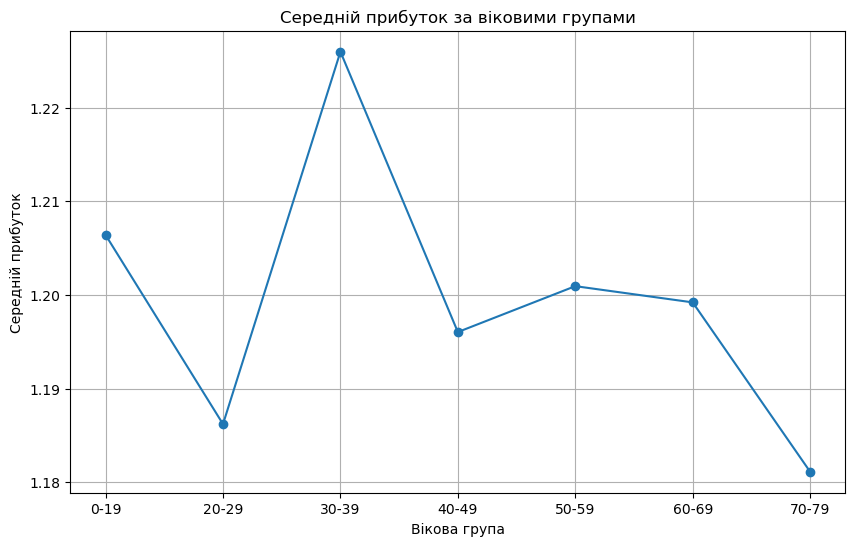

In [27]:
# Створення вікових груп
bins = [0, 20, 30, 40, 50, 60, 70, 80, 90, 100]
labels = ['0-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89', '90-100']
df['Age Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# Обчислення середнього прибутку для кожної вікової групи
age_group_profit = df.groupby('Age Group')['Profit Margin'].mean().reset_index()

# Побудова лінійного графіку
plt.figure(figsize=(10, 6))
plt.plot(age_group_profit['Age Group'], age_group_profit['Profit Margin'], marker='o')
plt.title('Середній прибуток за віковими групами')
plt.xlabel('Вікова група')
plt.ylabel('Середній прибуток')
plt.grid(True)
plt.show()

Отже можемо зробити висновок, що розбивши на групи за віком і побудувавши лініний графік ми змогли переконатися у нашому припущенні - дійсно найбільший прибуток приносять саме покупці віком 30-39 років, а найменший прибуток покупці віком 70-79, а також невеликий прибуток приносять покупці віком 20-29 років, що дивно, що ця вікова гупа має прибуток нижчий ніж для вікової групи 0-19 - можливо це була якась разова велика покупка.


**Питання №2** ля аналізу сезонності ми можемо розглянути продажі за місяцями або кварталами, щоб виявити патерни в прибутках протягом року. 

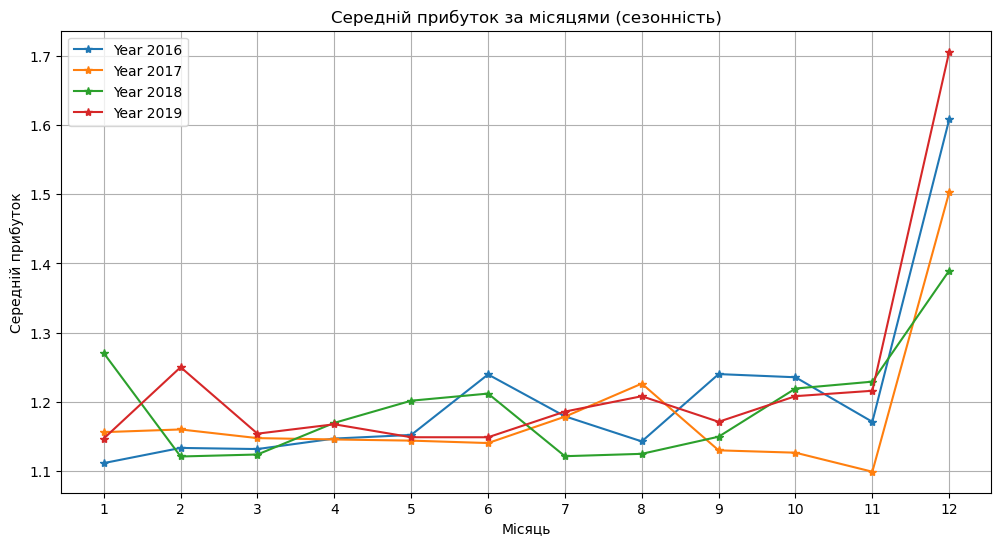

In [29]:
# Обчислення середнього прибутку за кожен місяць
monthly_profit = df.groupby(['Year', 'Month'])['Profit Margin'].mean().reset_index()

# Побудова лінійного графіку
plt.figure(figsize=(12, 6))
for year in monthly_profit['Year'].unique():
    yearly_data = monthly_profit[monthly_profit['Year'] == year]
    plt.plot(yearly_data['Month'], yearly_data['Profit Margin'], marker='*', label=f'Year {year}')

plt.title('Середній прибуток за місяцями (сезонність)')
plt.xlabel('Місяць')
plt.ylabel('Середній прибуток')
plt.xticks(range(1, 13))
plt.grid(True)
plt.legend()
plt.show()

Як ми бачимо з графіку в нас прослідковується чітка сезонність, а саме пік по прибутку ми маємо на прикинці року - це досить очікувано, адже люди роблять максмальні закупи саме на новорічні та різдвяні свята. Як варіант ми можемо проводити акції в інші не святкові періоди з метою покращення прибутку і в інші сезони, окрім святкового періоду. Дана тенденція зберігається і по роках з 2016 по 2019 роки - динаміка має один характер.

**Питання №3** Аналіз купівельних тенденцій по категоріях товарів

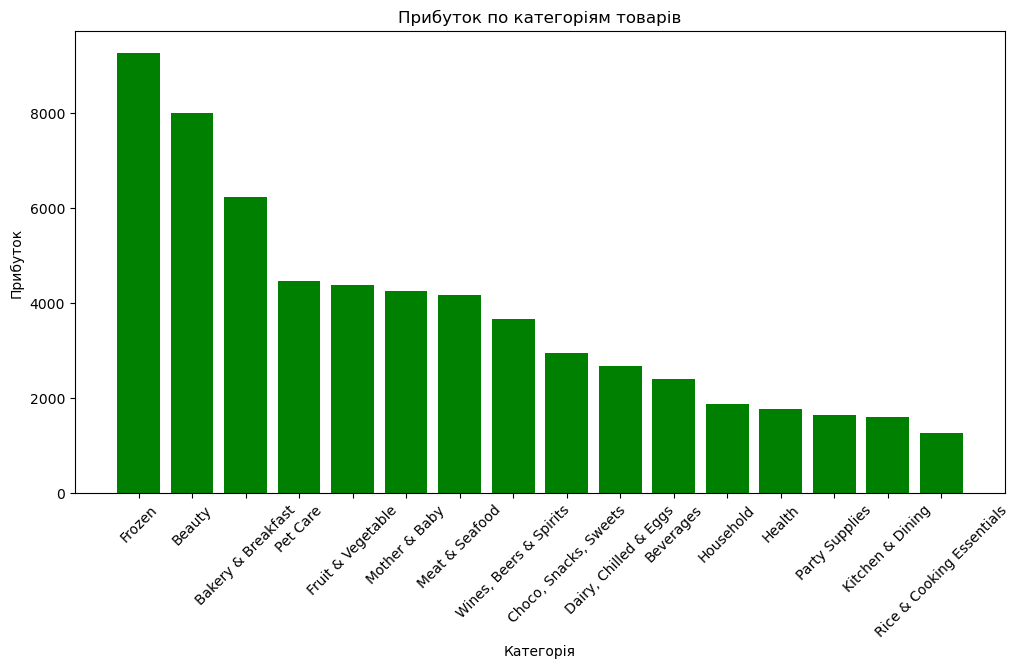

In [33]:
category_profit = df.groupby('Category')['Profit Margin'].sum().reset_index()
category_profit = category_profit.sort_values(by='Profit Margin', ascending=False)

plt.figure(figsize=(12, 6))
plt.bar(category_profit['Category'], category_profit['Profit Margin'], color='green')
plt.title('Прибуток по категоріям товарів')
plt.xlabel('Категорія')
plt.ylabel('Прибуток')
plt.xticks(rotation=45)
plt.show()

Отже виходячи з даної візуалізації ми можемо зробити висновок що найбільш прибуткові категорії товарів це заморожені товари, товари для краси та випічка. Найменш прибуткові це рис та все для приготування їжі. Отже ми можемо зробити знижки чи промо акції на ці групи товарів з метою збільшення попиту на них а отже з метою збільшення прибутку по даній категорї товарів.

**Питання №4** Аналіз за містами. Можна проаналізувати, в яких містах здійснюється найбільше покупок і який прибуток вони приносять.

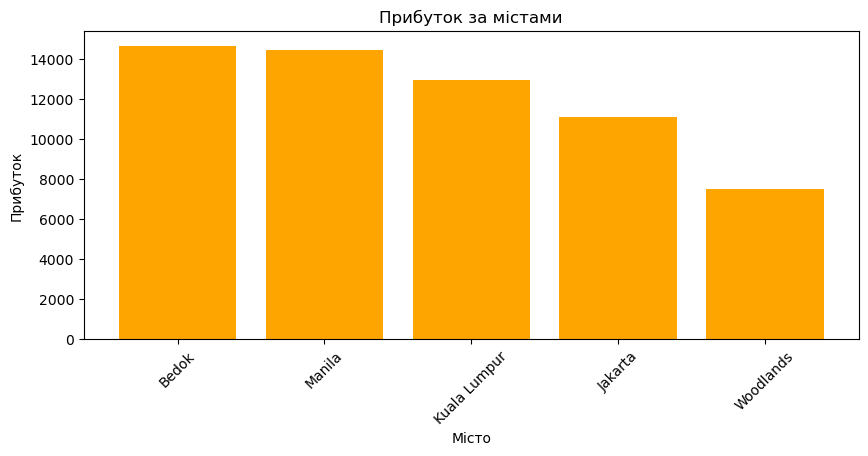

In [36]:
city_profit = df.groupby('City')['Profit Margin'].sum().reset_index()
city_profit = city_profit.sort_values(by='Profit Margin', ascending=False).head(10)

plt.figure(figsize=(10, 4))
plt.bar(city_profit['City'], city_profit['Profit Margin'], color='orange')
plt.title('Прибуток за містами')
plt.xlabel('Місто')
plt.ylabel('Прибуток')
plt.xticks(rotation=45)
plt.show()

Як видно з аналізу найбільш прибутковим є міста Бедок та Маніла. Найменш прибутковим Вудландс. Можемо окремо у місті Вудландс подивитися які товари там продаються і визначити можливо там товари, що приносять низкий прибуток.

**Питання №5** 

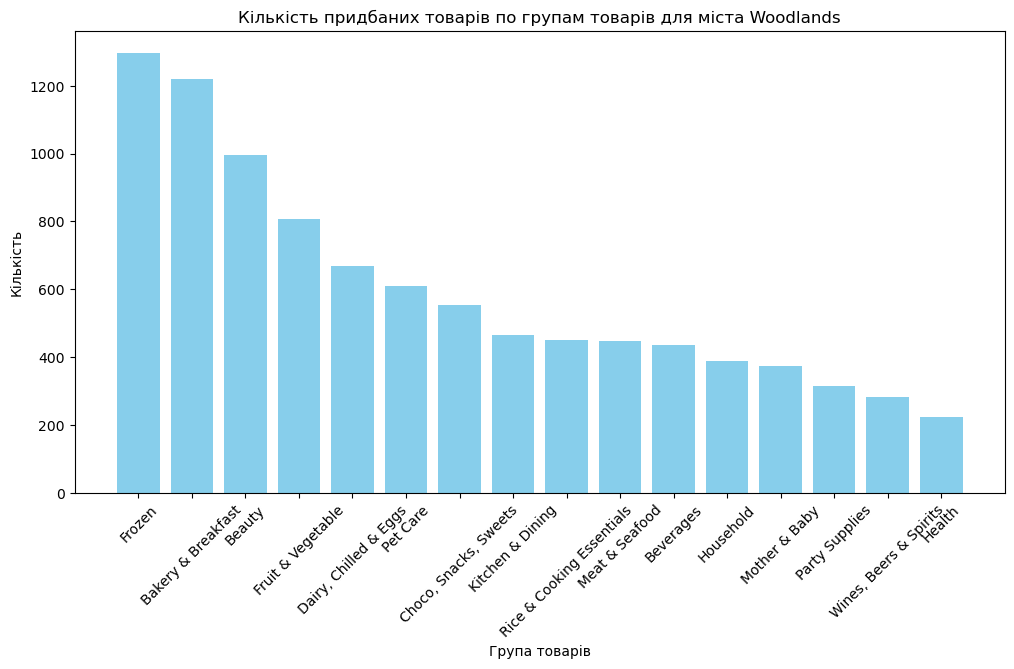

In [42]:
# Фільтрація даних для міста Woodlands
woodlands_data = df[df['City'] == 'Woodlands']

# Групування даних по групам товарів та підрахунок прибутку
product_quantity = woodlands_data.groupby('Category')['QTY'].sum().reset_index()

# Сортування даних за прибутком у спадному порядку
product_quantity = product_quantity.sort_values(by='QTY', ascending=False)

# Візуалізація даних
plt.figure(figsize=(12, 6))
plt.bar(product_quantity['Category'], product_quantity['QTY'], color='skyblue')
plt.title('Кількість придбаних товарів по групам товарів для міста Woodlands')
plt.xlabel('Група товарів')
plt.ylabel('Кількість')
plt.xticks(rotation=45)
plt.show()

Отже ми бачимо що за кількістю дуже багато в цьому місті продається товару Рис та Все для приготування їжі що є за нашим попереднім аналізом найнижчою за прибутковм групою товарів, отже це і є причиною такого низького прибутку в цілому по цьому місту. Можливо треба передивитися цінову політику і трохи в цьому місті підняти ціну на ду групу товарів.


**Питання 6.** Гендерний аналіз. 

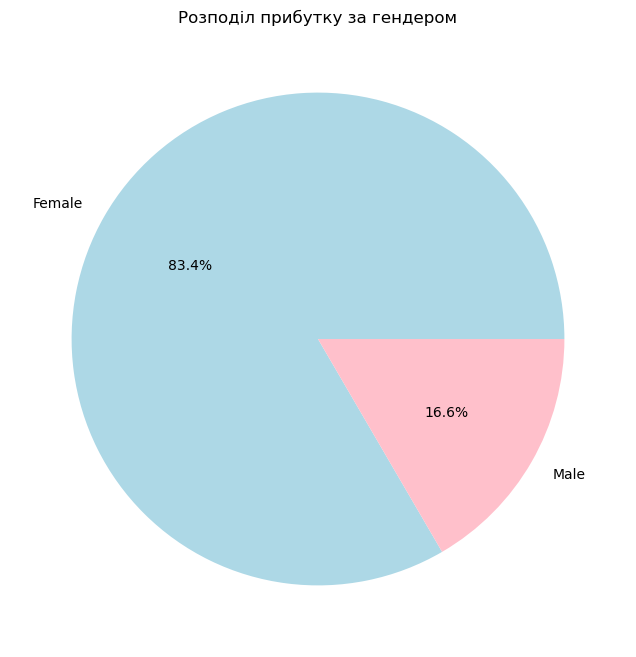

In [44]:
# Групування даних за гендером та підрахунок прибутку
gender_profit = df.groupby('Gender')['Profit Margin'].sum().reset_index()

# Візуалізація у вигляді пай-чарту
plt.figure(figsize=(8, 8))
plt.pie(gender_profit['Profit Margin'], labels=gender_profit['Gender'], autopct='%1.1f%%', colors=['lightblue', 'pink'])
plt.title('Розподіл прибутку за гендером')
plt.show()

Як ми бачимо що быльший прибуток приносять саме жінки, адже як правило вони частіше ходять по магазинах ніж чоловіки. Тепер цікаво трохи поглибитися і подивитися які групи товарів переважно купують чоловіки а які групи товарів купують жінки.

**Питання 7.** Гендерний аналіз - товарна структура.


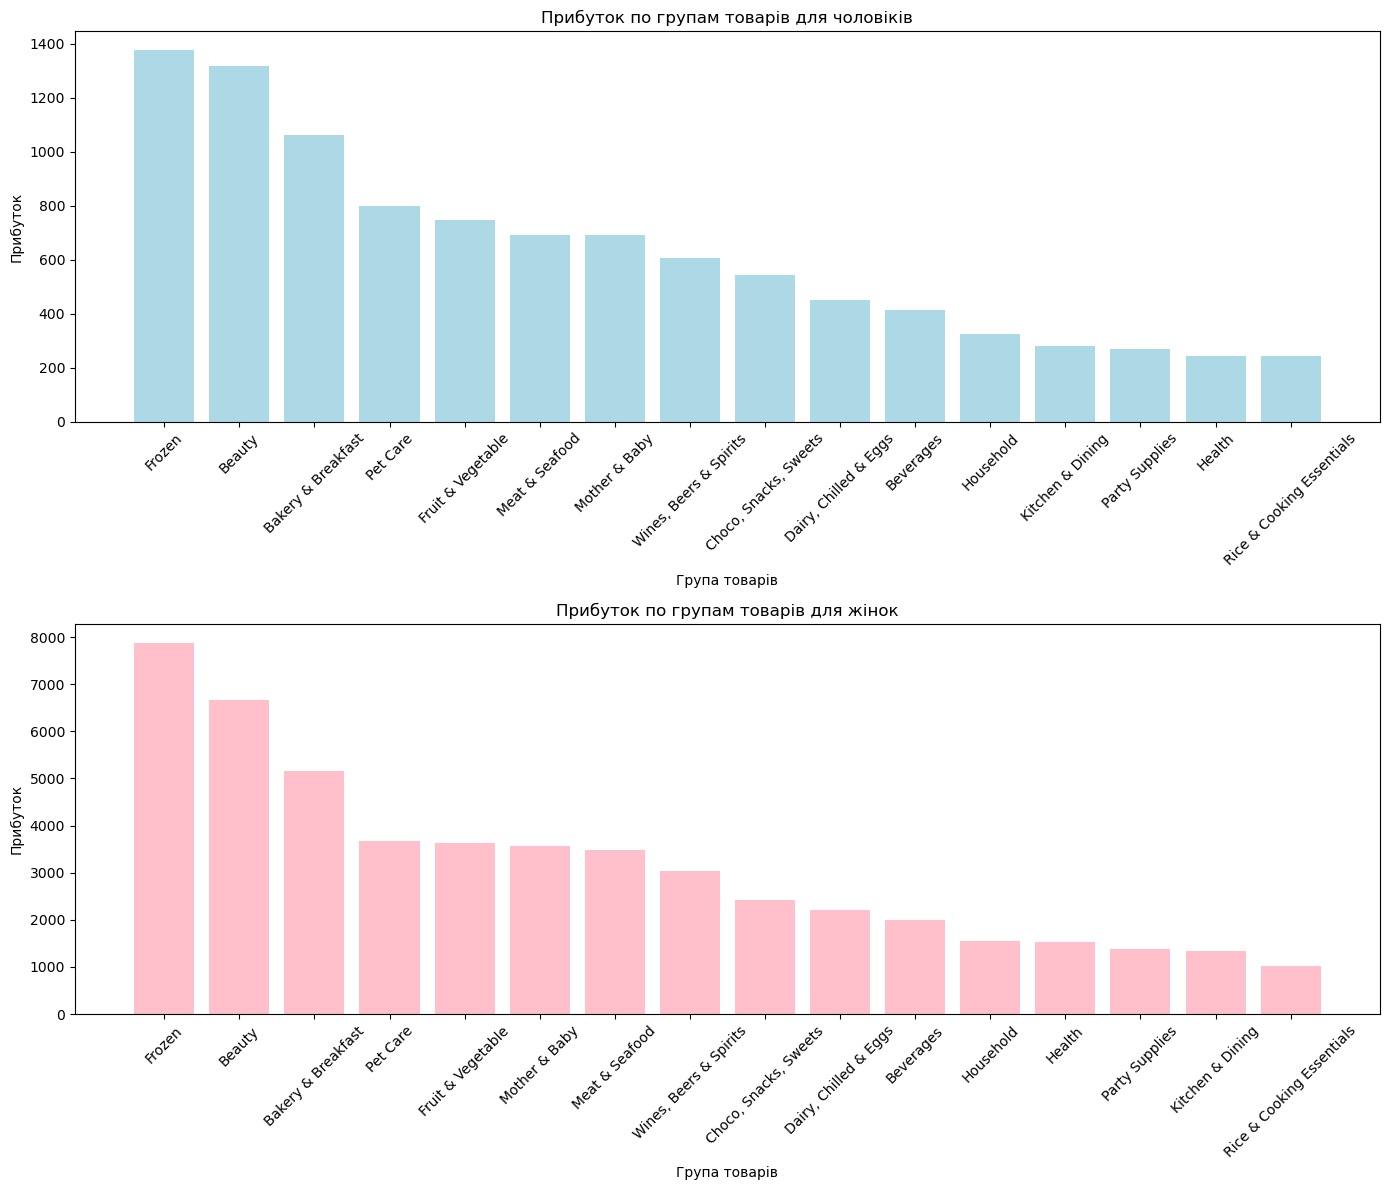

In [50]:
# Фільтрація даних для чоловіків та жінок
male_data = df[df['Gender'] == 'Male']
female_data = df[df['Gender'] == 'Female']

# Групування даних по категоріям товарів та підрахунок прибутку
male_product_profit = male_data.groupby('Category')['Profit Margin'].sum().reset_index()
female_product_profit = female_data.groupby('Category')['Profit Margin'].sum().reset_index()

# Сортування даних за прибутком у спадному порядку
male_product_profit = male_product_profit.sort_values(by='Profit Margin', ascending=False)
female_product_profit = female_product_profit.sort_values(by='Profit Margin', ascending=False)

# Візуалізація
fig, ax = plt.subplots(2, 1, figsize=(14, 12))

# Графік для чоловіків
ax[0].bar(male_product_profit['Category'], male_product_profit['Profit Margin'], color='lightblue')
ax[0].set_title('Прибуток по групам товарів для чоловіків')
ax[0].set_xlabel('Група товарів')
ax[0].set_ylabel('Прибуток')
ax[0].tick_params(axis='x', rotation=45)

# Графік для жінок
ax[1].bar(female_product_profit['Category'], female_product_profit['Profit Margin'], color='pink')
ax[1].set_title('Прибуток по групам товарів для жінок')
ax[1].set_xlabel('Група товарів')
ax[1].set_ylabel('Прибуток')
ax[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


Як бачимо групи товарів для обох генедерів однакові, що свідчить про те що просто жінки роблять покупки частіше і в більшій кільеості.

**Питання 8.** Аналіз використання платіжних методів

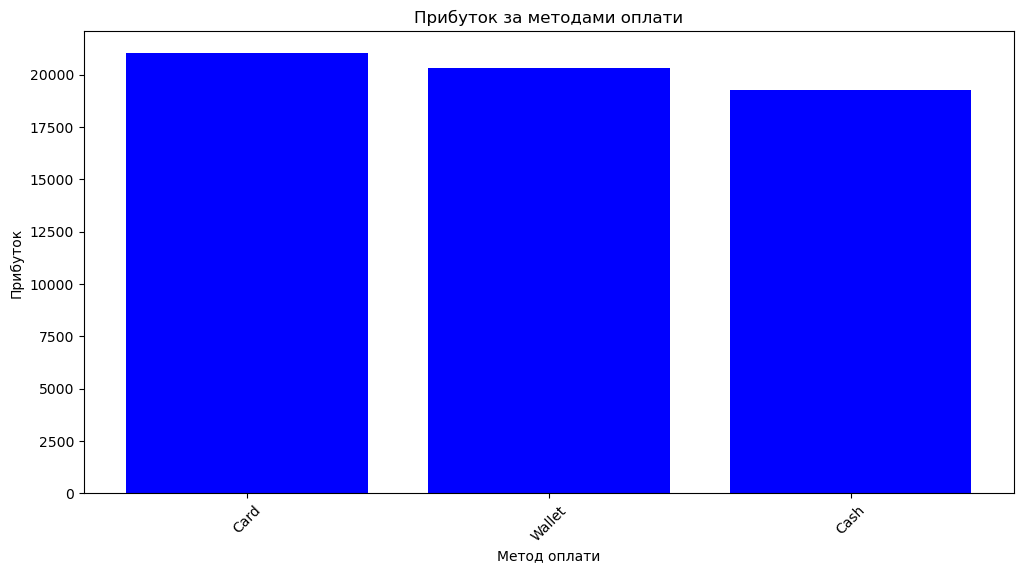

In [53]:
payment_profit = df.groupby('Payment Mode')['Profit Margin'].sum().reset_index()
payment_profit = payment_profit.sort_values(by='Profit Margin', ascending=False)

plt.figure(figsize=(12, 6))
plt.bar(payment_profit['Payment Mode'], payment_profit['Profit Margin'], color='blue')
plt.title('Прибуток за методами оплати')
plt.xlabel('Метод оплати')
plt.ylabel('Прибуток')
plt.xticks(rotation=45)
plt.show()

Як ми бачимо переважна кількість прибутку ми маємо саме за рахунок оплат картковим способом. Найменшу частину займає оплата кешем - тобто готівкою.

**Питання 9.** Гендерний аналіз в рамках країн.

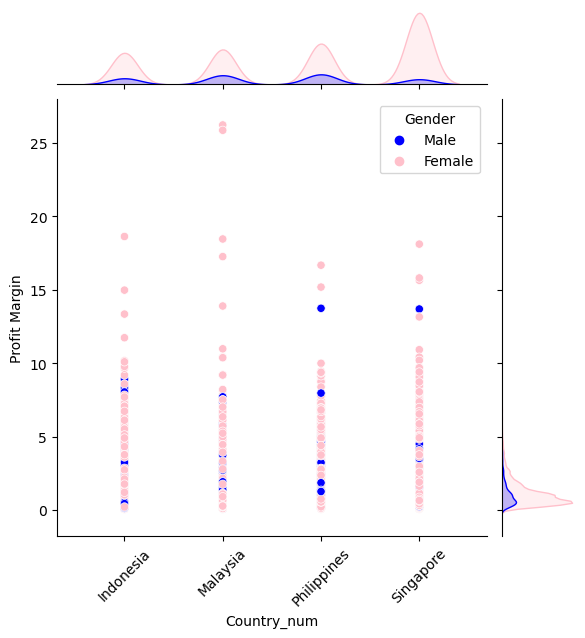

In [56]:
# Присвоїмо числові значення змінній 'Country' для побудови графіка
df['Country_num'] = df['Country'].astype('category').cat.codes

# Створення графіка за допомогою jointplot
g = sns.jointplot(x='Country_num', y='Profit Margin', data=df, kind='scatter', hue='Gender', palette={'Male': 'blue', 'Female': 'pink'})

# Додавання міток для осі x
countries = df['Country'].astype('category').cat.categories
g.ax_joint.set_xticks(range(len(countries)))
g.ax_joint.set_xticklabels(countries, rotation=45)

plt.show()

Це дуже зручний графік який дає нам відповідь одразу на декілька питань:
    1. Ми бачимо із розподілу по кольору що наприклад в Сінгапурі майже увесь прибуток ми маємо віж жіночої аудиторії - отже можемо робити тут в цьому регіоні саме промоакції більш направлені на жіночу аудиторію.
    2. А от в Філіпінах ми бачимо що навідміну від інших країн є багато прибутку саме від чоловіків - отже тут ми можемо розширити асортимент товарів для чоловіків і роити акції напарвлені на цю категорію населення.
    3. Розподіл прибутку між країнами є досить рівномірний. Є окремі викиди - крупні прибуткові чеки по країні Малайзія - однак це невелика кількість на фоні загального прибутку.
    

**Питання 10.** Продуктовий аналіз (топ10) на рівні країн.

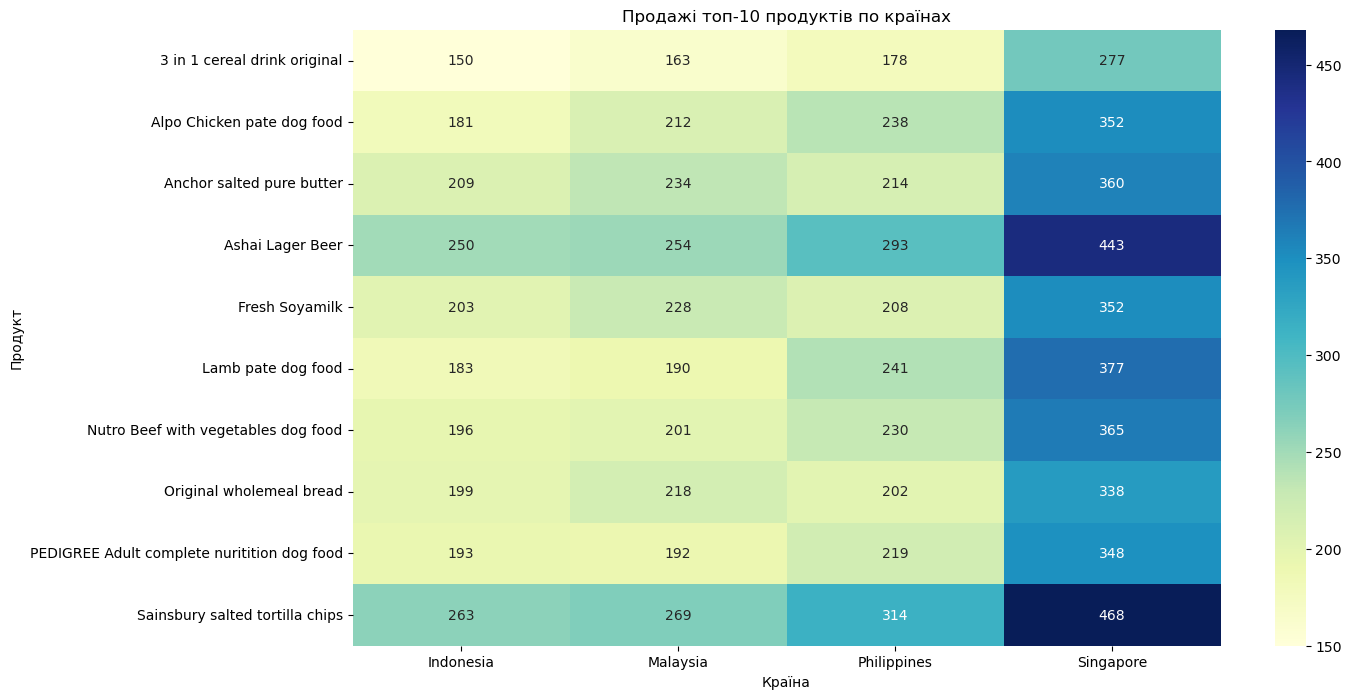

In [58]:
# Групування даних за продуктами та країнами
product_sales = df.groupby(['Items', 'Country'])['QTY'].sum().reset_index()

# Сортування даних за кількістю продажів у спадному порядку
product_sales = product_sales.sort_values(by='QTY', ascending=False)

# Вибір топ-10 продуктів з найбільшими продажами
top_products = product_sales.groupby('Items')['QTY'].sum().reset_index().sort_values(by='QTY', ascending=False).head(10)

# Об'єднання з оригінальними даними для отримання продажів цих продуктів по країнах
top_product_sales = product_sales[product_sales['Items'].isin(top_products['Items'])]

# Використання pivot_table для створення зведеної таблиці
heatmap_data = top_product_sales.pivot_table(values='QTY', index='Items', columns='Country', aggfunc='sum')

# Візуалізація за допомогою heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(heatmap_data, annot=True, cmap='YlGnBu', fmt='g')
plt.title('Продажі топ-10 продуктів по країнах')
plt.xlabel('Країна')
plt.ylabel('Продукт')
plt.show()

Виходячи з даного аналізу ми можемо наочоно побачити які товари є найбільш популярними (входять до топ10) в розрізі країн. І ми бачимо що це комбінація товарів - чіпси з тортільї та Ашаї пиво лагер. Дана комбінація є топовою в усіх країнах. Отже ми можемо проводити маркетингові акції по типу комбінувати ці товари разом і робити якусь знижку і тим самом збільшувати продаж цих обох товарів і збільшити прибуток.

**Питання 11.** Проведемо невилчкий z-тест. Нульова гыпотеза буде полягати в тому, що ми припустимо що прибуток выд обох гендерів жінки і чоловікі рівний. Первіримо нашу нульову гіпотезу.

In [61]:
import numpy as np
from scipy import stats

# Витягнемо дані для чоловіків та жінок
male_profit = df[df['Gender'] == 'Male']['Profit Margin']
female_profit = df[df['Gender'] == 'Female']['Profit Margin']

# Обчислимо середнє і стандартне відхилення для обох груп
mean_male = np.mean(male_profit)
mean_female = np.mean(female_profit)
std_male = np.std(male_profit, ddof=1)
std_female = np.std(female_profit, ddof=1)

# Обчислимо кількість спостережень у кожній групі
n_male = len(male_profit)
n_female = len(female_profit)

# Обчислимо стандартну помилку різниці між середніми
se_diff = np.sqrt((std_male**2 / n_male) + (std_female**2 / n_female))

# Обчислимо Z-статистику
z = (mean_male - mean_female) / se_diff

# Обчислимо p-значення
p_value = 2 * (1 - stats.norm.cdf(np.abs(z)))

print(f"Z-статистика: {z}")
print(f"P-значення: {p_value}")

Z-статистика: -3.5598450791728076
P-значення: 0.00037107363671573523


Z-статистика: Значення Z-статистики -3.56 означає, що різниця між середніми значеннями прибутку для чоловіків і жінок відхиляється від нуля на 3.56 стандартних відхилень у негативний бік. Це значне відхилення від нульової гіпотези, яка передбачає, що середні значення прибутку для чоловіків і жінок однакові.

P-значення: P-значення 0.000371 вказує на ймовірність отримання таких результатів або екстремальніших, якщо нульова гіпотеза правильна. Оскільки це значення дуже маленьке і значно менше типового рівня значущості (наприклад, 0.05), ми відхиляємо нульову гіпотезу.

Висновок - отже ми чітко прослідковуємо велику різницю в прибутку між двома гендерами, що скоріше обумовлено порядком в азіатських країнах - де переважні закупівлі відбуваються жінками.

https://public.tableau.com/app/profile/olha.kunieieva/viz/Book1_17207998354570/ProfitDashboard?publish=yes Це моя лінка на Tableu Dashboard